Example 2.3.a

In [1]:
def nameof(var, local_vars):
    return [name for name, value in local_vars.items() if value is var].pop()


def Mean(data: list[float]) -> float:
    return sum(data)/len(data)

print(Mean([280, 278, 272, 276, 281, 279, 276, 281, 289, 280]))

279.2


In [2]:
def DotProduct(v1: list[float], v2: list[float]) -> float:
    if len(v1) != len(v2):
        raise SyntaxError("Lists must be of equal length.")
    
    result = 0
    for i in range(len(v1)):
        result += v1[i] * v2[i]
    return result

def WeighedAverage(data: list[tuple[float, float]]) -> float:
    v1 = [v[0] for v in data]
    v2 = [v[1] for v in data]
    return DotProduct(v1, v2)/sum(v2)

def WeighedMean(values: list[float], frequencies: list[float]) -> float:
    if len(values) != len(frequencies):
        raise SyntaxError("Lists must be of equal length")
    return DotProduct(values, frequencies)/sum(frequencies)

print (WeighedMean([15, 16, 17, 18, 19, 20], [2, 5, 11, 9, 14, 13]))
print(WeighedAverage([(15, 2), (16, 5), (17, 11), (18, 9), (19, 14), (20, 13)]))

18.24074074074074
18.24074074074074


In [3]:
def Median(data: list[float]) -> float:
    data.sort()
    length = len(data)
    if length%2 == 1:
        return data[length//2]
    else:
        return (data[length//2] + data[length//2 - 1])/2

def StemLeafToList(stemleaf: dict[int, list[str]]) -> list[float]:
    return [float(str(k) + i) for k, v in stemleaf.items() for i in v]

def StemLeafMedian(stemleaf: dict[int, list[str]]) -> float:
    return Median(StemLeafToList(stemleaf))

def StemLeafMean(stemleaf: dict[int, list[str]]) -> float:
    return Mean(StemLeafToList(stemleaf))

germ_free_mice = { 
    1: ["58", "92", "93", "94", "95"], 
    2: ["02", "12", "15", "29", "30", "37", "40", "44", "47", "59"], 
    3: ["01", "01", "21", "37"], 
    4: ["15", "34", "44", "85", "96"], 
    5: ["29", "37"], 
    6: ["24"], 
    7: ["07"], 
    8: ["00"]
}
conventional_mice = {
    1: ["59", "89", "91", "98"],
    2: ["35", "45", "50", "56", "61", "65", "66", "80"],
    3: ["43", "56", "83"],
    4: ["03", "14", "28", "32"]
}

print("mean for " + nameof(germ_free_mice, locals()) + ": ", StemLeafMean(germ_free_mice))
print("median for " + nameof(germ_free_mice, locals()) + ": ", StemLeafMedian(germ_free_mice))
print("mean for " + nameof(conventional_mice, locals()) + ": ", StemLeafMean(conventional_mice))
print("median for " + nameof(conventional_mice, locals()) + ": ", StemLeafMedian(conventional_mice))

mean for germ_free_mice:  344.0689655172414
median for germ_free_mice:  259.0
mean for conventional_mice:  292.3157894736842
median for conventional_mice:  265.0


In [4]:
def Mode(data: list[float]) -> float:
    return max(set(data), key = data.count)

def ValueFrequencyMode(data: list[tuple[float, int]]) -> float:
    for value, freq in data:
        if freq == max(data, key = lambda x: x[1])[1]:
            return value

def ValueFrequencyListToList(data: list[tuple[float, int]]) -> list[float]:
    return [v for value, freq in data for v in [value] * freq]

print(ValueFrequencyMode([(1, 9), (2, 8), (3, 5), (4, 5), (5, 6), (6, 7)]))

1


In [5]:
def Variance (data: list[float]) -> float:
    mean = Mean(data)
    return sum((x - mean)**2 for x in data)/(len(data)-1)

print(Variance([3, 4, 6, 7, 10]))
print(Variance([-20, 5, 15, 24]))

7.5
360.6666666666667


In [6]:
import math

def StandardDeviation (data: list[float]) -> float:
    return math.sqrt(Variance(data))

print(StandardDeviation([3, 4, 6, 7, 10]))
print(StandardDeviation([-20, 5, 15, 24]))

2.7386127875258306
18.991226044325487


EXERCISE 1: The following is a sample of prices, rounded to the nearest cent, charged
per gallon of standard unleaded gasoline in the San Francisco Bay area in
June 1997.
3.88, 3.90, 3.93, 3.90, 3.93, 3.96, 3.88, 3.94, 3.96, 3.88, 3.94, 3.99, 3.98
Represent these data in
a. a frequency table;
b. a relative frequency line graph.

{3.88: 3, 3.9: 2, 3.93: 2, 3.96: 2, 3.94: 2, 3.99: 1, 3.98: 1}
 Price  Frequency
  3.88          3
  3.90          2
  3.93          2
  3.96          2
  3.94          2
  3.99          1
  3.98          1


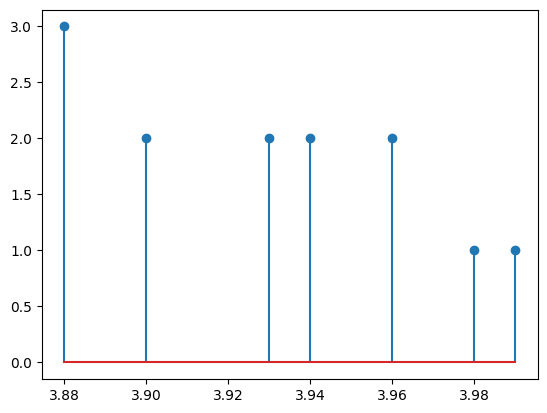

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

frequency = {}
values = [3.88, 3.90, 3.93, 3.90, 3.93, 3.96, 3.88, 3.94, 3.96, 3.88, 3.94, 3.99, 3.98]
for value in values:
    if value in frequency:
        frequency[value] += 1
    else:
        frequency[value] = 1
print(frequency)

x = list(frequency.keys())

y = list(frequency.values())

fig, ax = plt.subplots()

ax.stem(x, y)

data = {"Price": [3.88, 3.9, 3.93, 3.96, 3.94, 3.99, 3.98], 
        "Frequency": [3, 2, 2, 2, 2, 1, 1]}

df = pd.DataFrame(data)
print(df.to_string(index=False))

plt.show()

EXERCISE 3:. The following are the estimated oil reserves, in billions of barrels, for four
regions in the Western Hemisphere:
United States 38.7
South America 22.6
Canada 8.8
Mexico 60.0

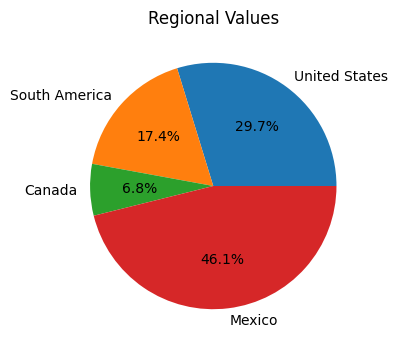

In [5]:
data = {
    'Region': ['United States', 'South America', 'Canada', 'Mexico'],
    'Value': [38.7, 22.6, 8.8, 60.0]
}
df = pd.DataFrame(data)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(df['Value'], labels=df['Region'], autopct='%1.1f%%')
plt.title('Regional Values')
plt.show()

In [7]:
def CountWordsInSentence(sentence: str) -> int:
  return len(sentence.split())

def CountWordsInParagraph(paragraph: str) -> int:
  return sum(CountWordsInSentence(sentence) for sentence in paragraph.split('.'))

def StemLeafWordsInText(text: str) -> dict[int, list[str]]:
  words = [CountWordsInSentence(sentence) for sentence in text.split('.')]
  MAX = max(words)
  MIN = min(words)
  
  min_stem = str(MIN)[0]
  max_stem = str(MAX)[0]

  leaf_len = len(str(MAX)) - 1

  stem_leaf: dict[str, list[str]] = {i: [] for i in range(min_stem, max_stem)}

  for word_count in words:
    stem = str(word_count)[0]
    stem_leaf[stem].append(str(word_count).zfill(leaf_len))

  return stem_leaf

#region text
sample = "A mitad del camino de la vida, en una selva oscura me encontraba porque mi ruta había extraviado. ¡Cuán dura cosa es decir cuál era esta salvaje selva, áspera y fuerte que me vuelve el temor al pensamiento! Es tan amarga casi cual la muerte; mas por tratar del bien que allí encontré, de otras cosas diré que me ocurrieron. Yo no sé repetir cómo entré en ella pues tan dormido me hallaba en el punto que abandoné la senda verdadera. Mas cuando hube llegado al pie de un monte, allí donde aquel valle terminaba que el corazón habíame aterrado, hacia lo alto miré, y vi que su cima ya vestían los rayos del planeta que lleva recto por cualquier camino. Entonces se calmó aquel miedo un poco, que en el lago del alma había entrado la noche que pasé con tanta angustia. Y como quien con aliento anhelante, ya salido del piélago a la orilla, se vuelve y mira al agua peligrosa, tal mi ánimo, huyendo todavía, se volvió por mirar de nuevo el sitio que a los que viven traspasar no deja. Repuesto un poco el cuerpo fatigado, seguí el camino por la yerma loma, siempre afirmando el pie de más abajo. Y vi, casi al principio de la cuesta, una onza ligera y muy veloz, que de una piel con pintas se cubría; y de delante no se me apartaba, mas de tal modo me cortaba el paso, que muchas veces quise dar la vuelta. Entonces comenzaba un nuevo día, y el sol se alzaba al par que las estrellas que junto a él el gran amor divino sus bellezas movió por vez primera; así es que no auguraba nada malo de aquella fiera de la piel manchada la hora del día y la dulce estación; mas no tal que terror no produjese la imagen de un león que luego vi. Me pareció que contra mí venía, con la cabeza erguida y hambre fiera, y hasta temerle parecia el aire. Y una loba que todo el apetito parecía cargar en su flaqueza, que ha hecho vivir a muchos en desgracia. Tantos pesares ésta me produjo, con el pavor que verla me causaba que perdí la esperanza de la cumbre. Y como aquel que alegre se hace rico y llega luego un tiempo en que se arruina, y en todo pensamiento sufre y llora: tal la bestia me hacía sin dar tregua, pues, viniendo hacia mí muy lentamente, me empujaba hacia allí donde el sol calla. Mientras que yo bajaba por la cuesta, se me mostró delante de los ojos alguien que, en su silencio, creí mudo. Cuando vi a aquel en ese gran desierto «Apiádate de mi -yo le grité-, seas quien seas, sombra a hombre vivo.» Me dijo: «Hombre no soy, mas hombre fui, y a mis padres dio cuna Lombardía pues Mantua fue la patria de los dos. Nací sub julio César, aunque tarde, y viví en Roma bajo el buen Augusto: tiempos de falsos dioses mentirosos. Poeta fui, y canté de aquel justo hijo de Anquises que vino de Troya, cuando Ilión la soberbia fue abrasada. ¿Por qué retornas a tan grande pena, y no subes al monte deleitoso que es principio y razón de toda dicha?» « ¿Eres Virgilio, pues, y aquella fuente de quien mana tal río de elocuencia? -respondí yo con frente avergonzada-. Oh luz y honor de todos los poetas, válgame el gran amor y el gran trabajo que me han hecho estudiar tu gran volumen. Eres tú mi modelo y mi maestro; el único eres tú de quien tomé el bello estilo que me ha dado honra. Mira la bestia por la cual me he vuelto: sabio famoso, de ella ponme a salvo, pues hace que me tiemblen pulso y venas.» «Es menester que sigas otra ruta -me repuso después que vio mi llanto-, si quieres irte del lugar salvaje; pues esta bestia, que gritar te hace, no deja a nadie andar por su camino, mas tanto se lo impide que los mata; y es su instinto tan cruel y tan malvado, que nunca sacia su ansia codiciosa y después de comer más hambre aún tiene. Con muchos animales se amanceba, y serán muchos más hasta que venga el Lebrel que la hará morir con duelo. Éste no comerá tierra ni peltre, sino virtud, amor, sabiduría, y su cuna estará entre Fieltro y Fieltro. Ha de salvar a aquella humilde Italia por quien murió Camila, la doncella, Turno, Euríalo y Niso con heridas. Éste la arrojará de pueblo en pueblo, hasta que dé con ella en el abismo, del que la hizo salir el Envidioso. Por lo que, por tu bien, pienso y decido que vengas tras de mí, y seré tu guía, y he de llevarte por lugar eterno, donde oirás el aullar desesperado, verás, dolientes, las antiguas sombras, gritando todas la segunda muerte; y podrás ver a aquellas que contenta el fuego, pues confían en llegar a bienaventuras cualquier día; y si ascender deseas junto a éstas, más digna que la mía allí hay un alma: te dejaré con ella cuando marche; que aquel Emperador que arriba reina, puesto que yo a sus leyes fui rebelde, no quiere que por mí a su reino subas. En toda parte impera y allí rige; allí está su ciudad y su alto trono. iCuán feliz es quien él allí destina!» Yo contesté: «Poeta, te requiero por aquel Dios que tú no conociste, para huir de éste o de otro mal más grande, que me lleves allí donde me has dicho, y pueda ver la puerta de San Pedro y aquellos infelices de que me hablas.» Entonces se echó a andar, y yo tras él."
#endregion


print(StemLeafWordsInText(sample))


TypeError: 'str' object cannot be interpreted as an integer